# Generating and testing a new microfacet angle distribution

In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

22.477924312110073


C:\Users\swkra\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


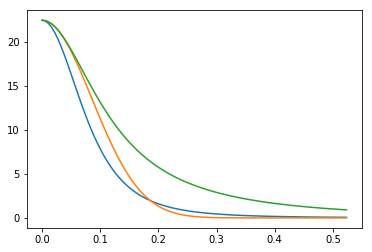

In [74]:
gamma = 0.119
# Trowbridge-Reitz micro-facet angle distribution, p. 88 of Claudio's thesis; normalized w/o shadowing/masking factor G in integral
def P_TR(alpha_):
    return np.power(gamma, 2) / \
               (np.pi * np.power(np.cos(alpha_), 4) *
                np.power(np.power(gamma, 2) + np.power(np.tan(alpha_), 2), 2))

    # Cook-Torrance distribution, p. 87
def P_CT(alpha_):
    return np.exp(-np.tan(alpha_)**2/gamma**2) / (np.pi * gamma**2 * np.cos(alpha_)**4)

def P_test(alpha_, gamma_):
    return 1. / (np.pi*gamma_**2*(1+(np.tan(alpha_)/gamma_)**2))

def P_test_cos(alpha_, gamma_):
    return np.cos(alpha_) / (np.pi*gamma_**2*(1+(np.tan(alpha_)/gamma_)**2))

def P_test_cos2(alpha_, gamma_):
    return np.cos(alpha_)**2 / (np.pi*gamma_**2*(1+(np.tan(alpha_)/gamma_)**2))

def P_test_sin(alpha_, gamma_):
    return 1. / (np.pi*gamma_**2*(1+(np.sin(alpha_)/gamma_)**2))

th = np.linspace(0.,np.pi/6,100.)
P_TR_list = P_TR(th)
P_CT_list = P_CT(th)
print(P_CT(0))
P_test_list = P_test(th, gamma)
P_test_cos_list = P_test_cos(th, gamma)
P_test_sin_list = P_test_sin(th, gamma)
plt.plot(th,P_TR_list)
plt.plot(th,P_CT_list)
plt.plot(th,P_test_list)
#plt.plot(th,P_test_cos_list)
#plt.plot(th,P_test_sin_list)

In [75]:
def P_test_int(alpha_, gamma_):
    return np.cos(alpha_)*np.sin(alpha_)*P_test(alpha_,gamma_)
def P_test_integral(gamma_):
    return scipy.integrate.quad(P_test_int,0.,np.pi/2,gamma_)[0]*2*np.pi
#def P_CT_int(alpha_):
#    return np.cos(alpha_)*np.sin(alpha_)*P_CT(alpha_)
#scipy.integrate.quad(P_CT_int,0.,np.pi/2)[0]*2*np.pi
#P_test_integral(gamma)

def int_fitter(ind_vars,A,c):
    return A*np.power(ind_vars,1.0)+c

print(P_test_integral(gamma))

3.366083782654198


Calculating integrals...
Fitting integrals to power law...
A: 1.3981349823098996, c: 0.12995400487316594


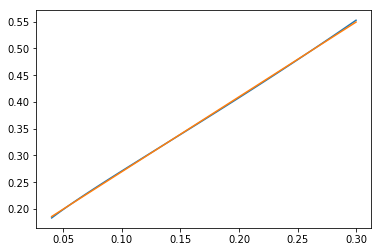

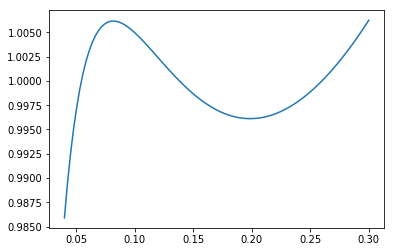

In [76]:
gamma_list = np.linspace(0.04,0.3,100)
print("Calculating integrals...")
P_test_integral_list = [1./P_test_integral(gamma_) for gamma_ in gamma_list]

print("Fitting integrals to power law...")
fit_results = scipy.optimize.curve_fit(int_fitter, gamma_list, P_test_integral_list)[0]
A_fit = fit_results[0]
#n_fit = fit_results[1]
c_fit = fit_results[1]
print("A: {0}, c: {1}".format(A_fit, c_fit))

plt.plot(gamma_list,P_test_integral_list)
plt.plot(gamma_list,int_fitter(gamma_list,A_fit,c_fit))
plt.figure()
plt.plot(gamma_list,P_test_integral_list/int_fitter(gamma_list,A_fit,c_fit))

Calculating integrals...


C:\Users\swkra\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


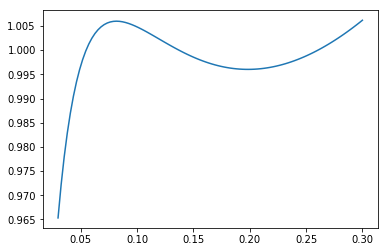

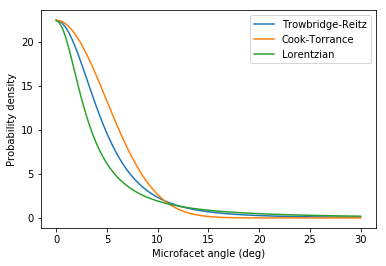

In [77]:
def P_test_norm(alpha_, gamma_):
    return (1.3981*gamma_+0.13) / (np.pi*gamma_**2*(1+(np.tan(alpha_)/gamma_)**2))

def P_test_norm_int(alpha_, gamma_):
    return np.cos(alpha_)*np.sin(alpha_)*P_test_norm(alpha_,gamma_)
def P_test_norm_integral(gamma_):
    return scipy.integrate.quad(P_test_norm_int,0.,np.pi/2,gamma_)[0]*2*np.pi

gamma_list = np.linspace(0.03,0.3,100)
print("Calculating integrals...")
P_test_norm_integral_list = [1./P_test_norm_integral(gamma_) for gamma_ in gamma_list]

plt.plot(gamma_list,P_test_norm_integral_list)

gamma = .119
th = np.linspace(0.,np.pi/6,100.)
P_TR_list = P_TR(th)
P_CT_list = P_CT(th)
gamma_norm = .054

P_test_norm_list = P_test_norm(th, gamma_norm)
plt.figure()
plt.plot(th*180/np.pi,P_TR_list,label="Trowbridge-Reitz")
plt.plot(th*180/np.pi,P_CT_list,label="Cook-Torrance")
plt.plot(th*180/np.pi,P_test_norm_list,label="Lorentzian")
plt.xlabel("Microfacet angle (deg)")
plt.ylabel("Probability density")
plt.legend()
# Rough equivalency of gamma factors (similar values at 0 deg)
# .119 -> .054
# .2 -> .105
# .05 -> .02

# Investigating two specular peaks at 60 deg in LXe

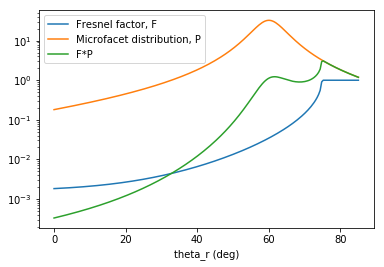

In [92]:
from TSTR_fit_new import F
n_0=1.69
n=1.56
polarization=0.5
gamma_norm = .086/2 # Scaled down by 2 to match code
theta_i = 60*np.pi/180
theta_r = np.linspace(0,85,200)*np.pi/180
theta_i_prime = 0.5 * np.arccos(np.cos(theta_i) * np.cos(theta_r) -
        np.sin(theta_i) * np.sin(theta_r) )
F_list = F(theta_i_prime, n_0, n, polarization)
alpha_specular = np.arccos((np.cos(theta_i) + np.cos(theta_r)) / (2 * np.cos(theta_i_prime)))
P_list = P_test_norm(alpha_specular, gamma_norm)
plt.plot(theta_r*180/np.pi,F_list,label="Fresnel factor, F")
plt.plot(theta_r*180/np.pi,P_list,label="Microfacet distribution, P")
plt.plot(theta_r*180/np.pi,F_list*P_list,label="F*P")
plt.xlabel("theta_r (deg)")
plt.legend()
plt.yscale("log")

# Calculating W for global angles beyond critical

In [78]:
def th_prime(th_i, al, phi_al):
    return np.arccos(np.cos(th_i)*np.cos(al)+np.sin(th_i)*np.sin(al)*np.cos(phi_al))

def alpha(th_i, th_p, phi_al):
    alpha_tmp = np.pi/2-np.arccos(np.cos(th_p)/np.sqrt(np.cos(th_i)**2+np.sin(th_i)**2*np.cos(phi_al)**2))\
            -np.arctan2(np.cos(th_i),np.sin(th_i)*np.cos(phi_al))
    shift = (alpha_tmp < -np.pi/2)*np.pi-(alpha_tmp > np.pi/2)*np.pi
    return alpha_tmp + shift
    
def phi_alpha_max(th_i, th_p):
    return np.arccos(np.sqrt(np.cos(th_p)**2-np.cos(th_i)**2)/np.sin(th_i)**2)

C:\Users\swkra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
C:\Users\swkra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
C:\Users\swkra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


Text(0,0.5,'alpha (deg)')

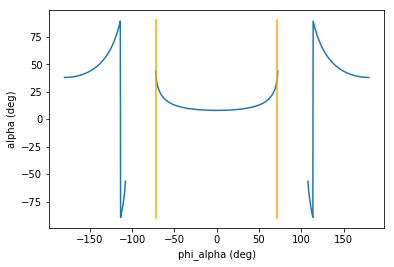

In [81]:
theta_i_deg = 75
theta_i = theta_i_deg*np.pi/180
theta_p_deg = 67
theta_p = theta_p_deg*np.pi/180
phi_alpha = np.linspace(-np.pi,np.pi,1000)
alpha_max = alpha(theta_i, theta_p, phi_alpha)
plt.plot(phi_alpha*180/np.pi, alpha_max*180/np.pi)
phi_alpha_m = phi_alpha_max(theta_i,theta_p)
phi_alpha_m_deg = phi_alpha_m*180/np.pi
plt.plot([-phi_alpha_m_deg,-phi_alpha_m_deg],[-90,90],color='orange')
plt.plot([phi_alpha_m_deg,phi_alpha_m_deg],[-90,90],color='orange')
plt.xlabel('phi_alpha (deg)')
plt.ylabel('alpha (deg)')

Text(0,0.5,'theta_prime (deg)')

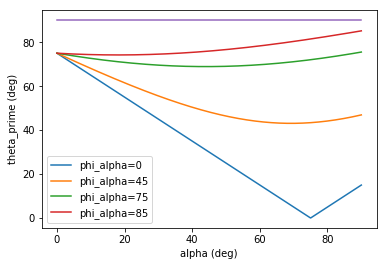

In [62]:
phi_alpha = 0
alph = np.linspace(0,np.pi/2,1000)
theta_p0 = th_prime(theta_i, alph, 0)
theta_p45 = th_prime(theta_i, alph, 45*np.pi/180)
theta_p75 = th_prime(theta_i, alph, 75*np.pi/180)
theta_p85 = th_prime(theta_i, alph, 85*np.pi/180)
plt.plot(alph*180/np.pi, theta_p0*180/np.pi,label="phi_alpha=0")
plt.plot(alph*180/np.pi, theta_p45*180/np.pi,label="phi_alpha=45")
plt.plot(alph*180/np.pi, theta_p75*180/np.pi,label="phi_alpha=75")
plt.plot(alph*180/np.pi, theta_p85*180/np.pi,label="phi_alpha=85")
plt.plot([0,90],[90,90])
plt.legend()
plt.xlabel('alpha (deg)')
plt.ylabel('theta_prime (deg)')
# Fails if alpha > theta_i (for phi_alpha=0), since arccos is guaranteed positive